In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PyMieScatt as ps
from matplotlib.ticker import ScalarFormatter

## 30/04/2025

### Tentando entender as distribuições

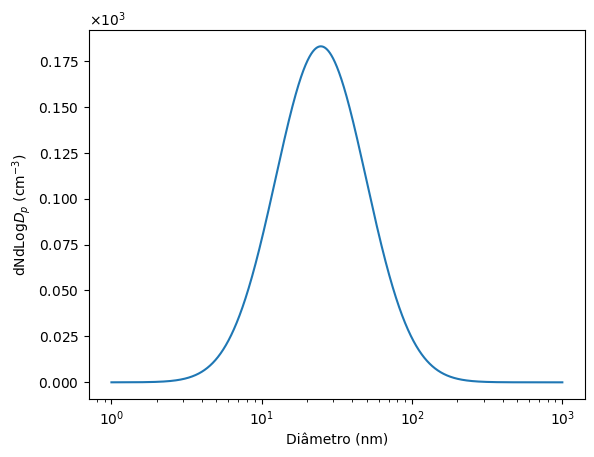

In [2]:
m3 = 1.47  + 0.011j
lambda_ = 300
geoStdDev = 2.0
geoMean = 40 #nm
numberOfParticles = 10000 #cm-3


resultados = ps.Mie_Lognormal(m=m3,wavelength=lambda_,geoStdDev=geoStdDev,geoMean=geoMean,numberOfParticles=numberOfParticles,asDict=True,returnDistribution=True)
bin_dist = resultados[1]
nc_dist = resultados[2]

dlogDp = []
for i in range(1,len(bin_dist)):
    delta = np.log10(bin_dist[i]) - np.log10(bin_dist[i-1])
    dlogDp.append(delta)

nc_dist = nc_dist[1:]  # Excluindo o primeiro valor

dNdlog = []
for j in range(len(nc_dist)):
    dNdlog.append((nc_dist[j]/dlogDp[j]))  
bin_dist = bin_dist[1:]  

plt.plot(bin_dist,nc_dist)
plt.xscale('log')

plt.xlabel('Diâmetro (nm)')
plt.ylabel('dNdLog$D_p$ (cm$^{-3}$)')
# Configurar o formato do eixo y para mostrar ×10³
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((3, 3))  # Força notação científica nos limites
plt.gca().yaxis.set_major_formatter(formatter)


plt.show()

In [3]:
def logNormal(bin_dist,geoStd,geoMean,numberConcentration):
    nc_dist=numberConcentration*(1/(np.sqrt(2*np.pi)*np.log(geoStd)*bin_dist))*np.exp(-(np.log(bin_dist)-np.log(geoMean))**2/(2*np.log(geoStd)**2))
    dlogDp = []
    for i in range(1,len(bin_dist)):
        delta = np.log(bin_dist[i]) - np.log(bin_dist[i-1])
        dlogDp.append(delta)

    nc_dist = nc_dist[1:]  # Excluindo o primeiro valor

    dNdlog = []
    for j in range(len(nc_dist)):
        dNdlog.append((nc_dist[j]/dlogDp[j]))  
    bin_dist = bin_dist[1:]  
    return bin_dist,nc_dist,dNdlog

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kikoc\AppData\Local\Temp\ipykernel_11112\1239627196.py:15: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(bin_dist,nc_dist,label=f'$D_p = {dg}$  $\sigma = {std}$')


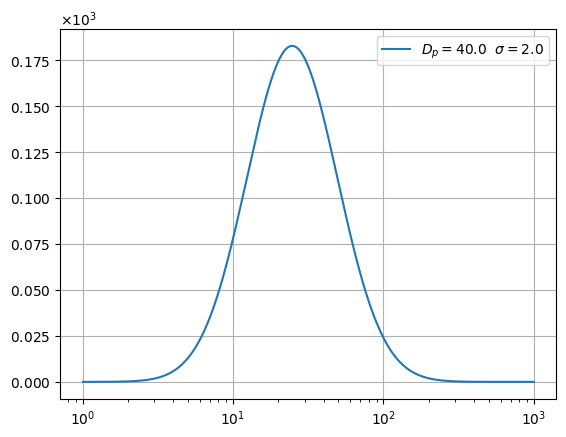

In [4]:
Dp = np.logspace(np.log10(1),np.log10(1000),1000)
dados = [
    #(Dp, 1.2, 12.6, 2166),
    #(Dp, 1.3, 30.7, 7166),
   # (Dp, 1.3, 83.8, 2166),
    (Dp,2.0, 40.0, 10000),
] 

for (x, std, dg,n) in dados:
    #resultados = ps.Mie_Lognormal(m3,lambda_,std,dg,n,asDict=True,returnDistribution=True)

    resultados = logNormal(x,std,dg,n)
    bin_dist = resultados[0]
    nc_dist = resultados[1]
    plt.plot(bin_dist,nc_dist,label=f'$D_p = {dg}$  $\sigma = {std}$')
# Configurar o formato do eixo y para mostrar ×10³
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((3, 3))  # Força notação científica nos limites
plt.gca().yaxis.set_major_formatter(formatter)
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

## 07/05/2025

In [5]:
m2 = 1.403 + 0j
m1 = 1.589 + 0.273j
m3 = 1.47  + 0.011j
m4 = 1.50  + 0.02j

geoStdDev = 2.0
geoMean = 40 #nm
numberOfParticles = 10000 #cm-3

Lambdas = np.linspace(400,800,20)

Bs1 = []
Bs2 = []
Bs3 = []
Bs4 = []
Ba1 = []
Ba2 = []
Ba3 = []
Ba4 = []

for lambda_ in Lambdas:
    Bs1.append(ps.Mie_Lognormal(m1,lambda_,geoStdDev,geoMean,numberOfParticles,asDict=True)['Bsca'])
    Ba1.append(ps.Mie_Lognormal(m1,lambda_,geoStdDev,geoMean,numberOfParticles,asDict=True)['Babs'])

#for lambda_ in Lambdas:
 #   Bs2.append(ps.Mie_Lognormal(m2,lambda_,geoStdDev,geoMean,numberOfParticles,asDict=True)['Bsca'])
  #  Ba2.append(ps.Mie_Lognormal(m2,lambda_,geoStdDev,geoMean,numberOfParticles,asDict=True)['Babs'])
#for lambda_ in Lambdas:
 #   Bs3.append(ps.Mie_Lognormal(m3,lambda_,geoStdDev,geoMean,numberOfParticles,asDict=True)['Bsca']) 
  #  Ba3.append(ps.Mie_Lognormal(m3,lambda_,geoStdDev,geoMean,numberOfParticles,asDict=True)['Babs'])   

#for lambda_ in Lambdas:
 #   Bs4.append(ps.Mie_Lognormal(m4,lambda_,geoStdDev,geoMean,numberOfParticles,asDict=True)['Bsca'])
  #  Ba4.append(ps.Mie_Lognormal(m4,lambda_,geoStdDev,geoMean,numberOfParticles,asDict=True)['Babs'])

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kikoc\AppData\Local\Temp\ipykernel_11112\86727200.py:2: SyntaxWarning: invalid escape sequence '\s'
  (Lambdas, Bs1, Bs2, Bs3,Bs4, '$\sigma_{scatt}$ (Mm$^{-1}$'),
C:\Users\kikoc\AppData\Local\Temp\ipykernel_11112\86727200.py:3: SyntaxWarning: invalid escape sequence '\s'
  (Lambdas, Ba1, Ba2,Ba3, Ba4, '$\sigma_{abs}$ (Mm$^{-1}$'),


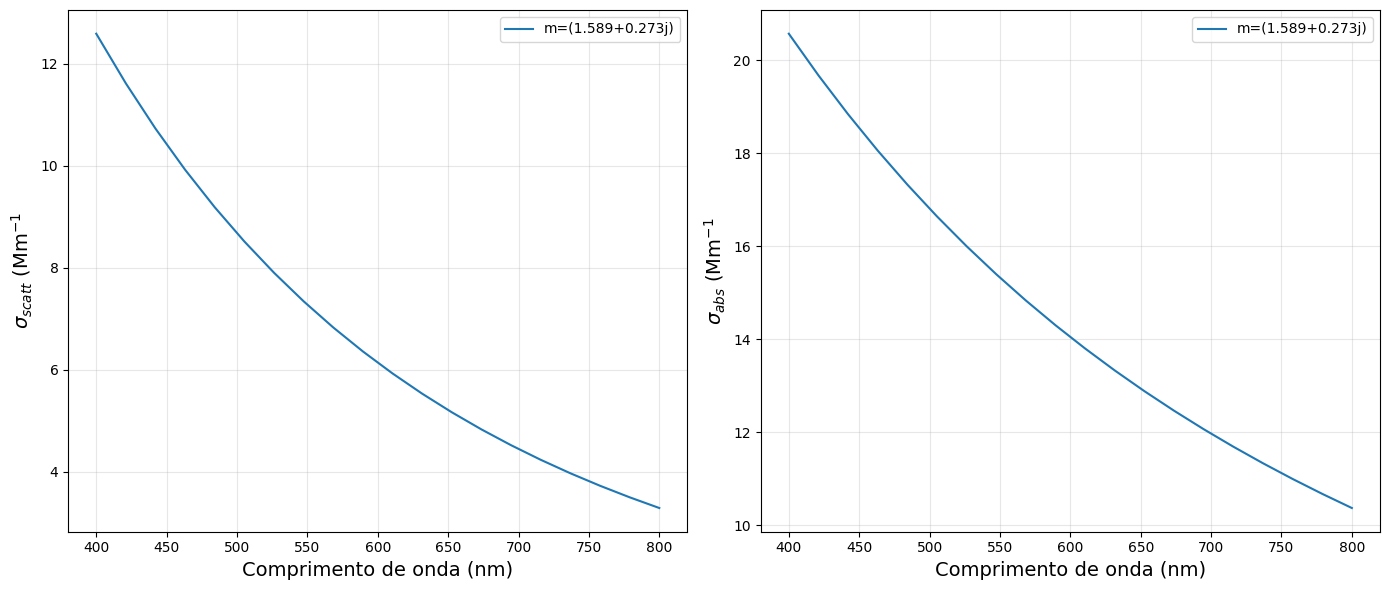

In [6]:
dados = [
    (Lambdas, Bs1, Bs2, Bs3,Bs4, '$\sigma_{scatt}$ (Mm$^{-1}$'),
    (Lambdas, Ba1, Ba2,Ba3, Ba4, '$\sigma_{abs}$ (Mm$^{-1}$'),
] 

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, (x, y1, y2,y3,y4, title) in zip(axes.ravel(), dados):

    ax.plot(x,y1,label=f'm={m1}')
    #ax.plot(x,y2,label=f'm={m2}')
    #ax.plot(x,y3,label=f'm={m3}')
    #ax.plot(x,y4,label=f'm={m4}')

    #ax.set_xscale('log')
    ax.set_xlabel("Comprimento de onda (nm)", fontsize=14)
    ax.set_ylabel(title, fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend()
plt.tight_layout()    
plt.show()

- Usar os dados da funcao que eu criei na funcao Mie_sd

## ??/06/2025

Primeiro, vamos comparar os resultados da função que eu criei na função da biblioeca para distribuições de SMPS

In [10]:
geoStdDev = 2.0
geoMean = 40 #nm
numberOfParticles = 10000 #cm-3
#Dp = np.linspace(5,300,1000)
Dp = np.logspace(np.log10(1),np.log10(1000),1000)
m = 1.589 + 0.273j

resultados = logNormal(Dp ,geoStdDev,geoMean,numberOfParticles)
bin_dist = resultados[0]
nc_dist = resultados[1]


Lambdas = np.linspace(400,800,20)

Bs1 = []
Ba1 = []


for lambda_ in Lambdas:
    resultados = ps.Mie_SD(m, lambda_, bin_dist, nc_dist,SMPS=False,asDict=True)
    Bs1.append(resultados['Bsca'])
    Ba1.append(resultados['Babs'])


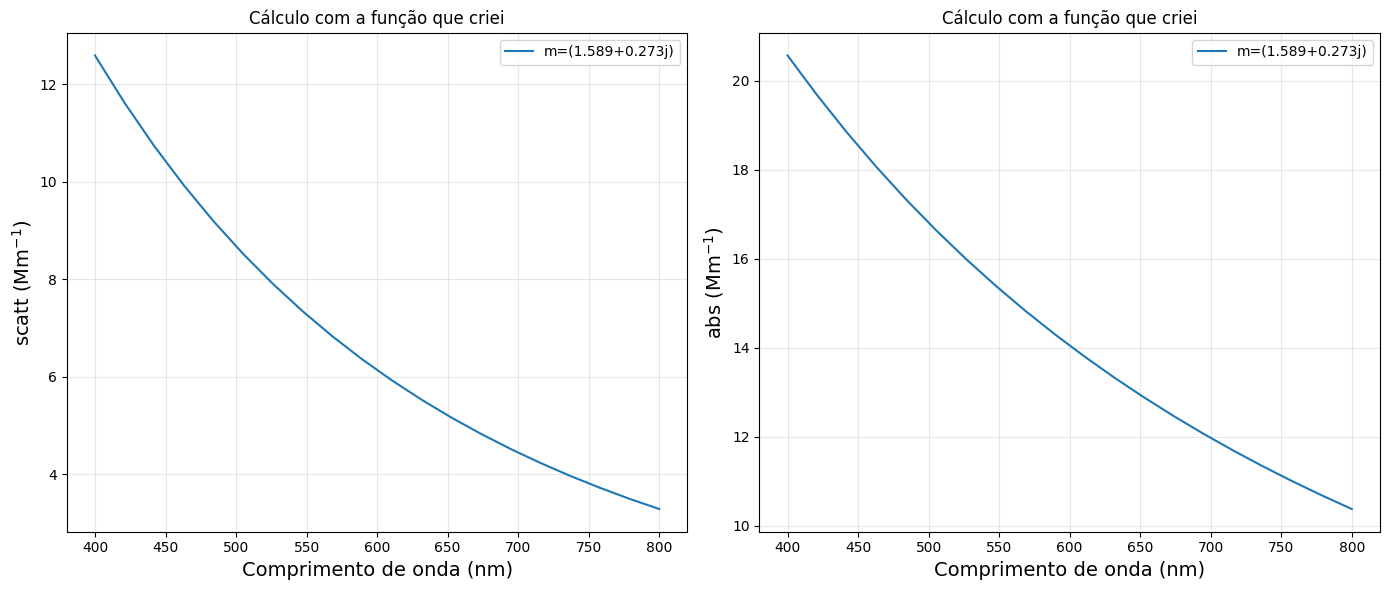

In [11]:
dados = [
    (Lambdas, Bs1, 'scatt (Mm$^{-1})$'),
    (Lambdas, Ba1, 'abs (Mm$^{-1})$'),
] 

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, (x, y1, title) in zip(axes.ravel(), dados):

    ax.plot(x,y1,label=f'm={m}')
    ax.set_title('Cálculo com a função que criei')
    ax.set_xlabel("Comprimento de onda (nm)", fontsize=14)
    ax.set_ylabel(title, fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend()
plt.tight_layout()    
plt.show()

In [9]:
resultados

{'Bext': np.float64(13.66520934257284),
 'Bsca': np.float64(3.290200092183915),
 'Babs': np.float64(10.375009250388924),
 'G': np.float64(0.39596421988839203),
 'Bpr': np.float64(12.36240782979452),
 'Bback': np.float64(1.6645421287618394),
 'Bratio': np.float64(40.89689304643635)}